In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pathlib
from matplotlib.lines import Line2D
from PIL import Image

%matplotlib inline


In [2]:
_METRICS_FILE = './files/benchmark'
_METRIC = 'accuracy'

## Read file with metrics

In [3]:
try:
    #read csv file
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except OSError as err:
    # if there is no csv file we read the excel file
    excel_file = pd.read_excel(_METRICS_FILE+'.xlsx')
    # transform the excel file in a csv file
    excel_file.to_csv(_METRICS_FILE+'.csv', index=False)
    # read the new csv file 
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except:
    print("ERROR WHILE READING METRICS FILE")


In [4]:
metrics['total_time_s'] = metrics.apply(lambda row: row['train_time_s']+row['test_time_s'], axis=1)

In [5]:
metrics.sample(5)

,dataset,classifier,total,tp,tn,fp,fn,precision,recall,f1,fbeta,accuracy,train_time_s,test_time_s,total_time_s
2291,WordSynonyms,MOA_ActiveClassifier,905.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153199,0.013508,0.123067,0.136574
436,ECG200,MOA_ActiveClassifier,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.526356,0.000194,0.001346,0.001540
2162,UWaveGestureLibraryX,MOA_RandomHoeffdingTree,4478.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.562690,0.058555,0.050877,0.109432
1038,ItalyPowerDemand,sklearn_BernoulliNB,1086.0,4.412844,3.33945,1.642202,0.568807,0.727574,0.894608,0.771873,0.784706,0.778287,0.030630,0.011693,0.042323
860,Ham,MOA_SingleClassifierDrift,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.669968,0.009755,0.008401,0.018157


## Useful variables

In [6]:
family_label = {'NN'  : 'Neural_Network',
                'LM'  : 'Linear_Model',
                'NB'  : 'Naive_Bayes',
                'DC'  : 'Dummy_Classifier',
                'DT'  : 'Decision_Trees',
                'MC'  : 'Meta_Classifier',
               }
classifier_family = {'keras_parallel_3_Dilated_Conv':'NN',
                   'keras_3_Dilated_Conv':'NN',
                   'sklearn_MLPClassifier':'NN',
                   'sklearn_Perceptron':'LM',
                   'sklearn_SGDClassifier':'LM',
                   'sklearn_BernoulliNB':'NB',
                   'sklearn_PassiveAggressiveClassifier':'LM',
                   'MOA_MajorityClass':'DC',
                   'MOA_RandomHoeffdingTree':'DT',
                   'MOA_NaiveBayes':'NB',
                   'MOA_SPegasos':'LM',
                   'MOA_OzaBagAdwin':'MC',
                   'MOA_OzaBoost':'MC',
                   'MOA_OzaBag':'MC',
                   'MOA_OCBoost':'MC',
                   'MOA_SingleClassifierDrift':'MC',
                   'MOA_WeightedMajorityAlgorithm':'MC',
                   'MOA_OzaBoostAdwin':'MC',
                   'MOA_Perceptron':'LM',
                   'MOA_HoeffdingAdaptiveTree':'NB',
                   'MOA_HoeffdingOptionTree':'NB',
                   'MOA_LeveragingBag':'MC',
                   'MOA_DecisionStump':'DT',
                   'MOA_OzaBagASHT':'MC',
                   'MOA_SGD':'LM',
                   'MOA_AdaHoeffdingOptionTree':'DT',
                   'MOA_ASHoeffdingTree':'DT',
                   'MOA_ActiveClassifier':'DC',
                   'MOA_HoeffdingTree':'DT'
                  }
#classifier_family = {'keras_3_Dilated_Conv':'NN',
#                   'keras_parallel_3_Dilated_Conv':'NN'
#                  }

family_classifier = {l:[k for k,v in classifier_family.items() if v == l] for l in family_label.keys()}
family_color = {'NN'  : 'k',
                'LM'  : 'b',
                'NB'  : 'g',
                'DC'  : 'y',
                'DT'  : 'r',
                'MC'  : 'm',
               }
line_style = ['-','--', '-.', ':', '>-','o--', 'x-.', '^:', 'o-','x--', '^-.', '>:', 'x-','^--', '>-.', 'o:', '^-','>--', 'o-.', 'x:']
classifier_to_compare = ['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv']


In [7]:
datasets = metrics['dataset'].unique()
classifiers = metrics['classifier'].unique()

In [8]:
directory = './files/'+_METRIC+'/'
directory = './files/'+_METRIC+'/'
pathlib.Path(directory).mkdir(parents=True, exist_ok=True)

## Estudio de los valores de _METRIC sin preprocesarlos

In [9]:
metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
metrics_table = metrics_table.dropna()
metrics_table = metrics_table[list(classifier_family.keys())]
print(metrics_table.shape)

# Add mean row and save to file
metrics_table.loc['mean'] = metrics_table.mean()
metrics_table.to_csv(directory+'table_'+_METRIC+'.csv')
metrics_table = metrics_table.drop(index='mean')

metrics_table.tail()


(91, 29)


classifier,keras_parallel_3_Dilated_Conv,keras_3_Dilated_Conv,sklearn_MLPClassifier,sklearn_Perceptron,sklearn_SGDClassifier,sklearn_BernoulliNB,sklearn_PassiveAggressiveClassifier,MOA_MajorityClass,MOA_RandomHoeffdingTree,MOA_NaiveBayes,...,MOA_HoeffdingAdaptiveTree,MOA_HoeffdingOptionTree,MOA_LeveragingBag,MOA_DecisionStump,MOA_OzaBagASHT,MOA_SGD,MOA_AdaHoeffdingOptionTree,MOA_ASHoeffdingTree,MOA_ActiveClassifier,MOA_HoeffdingTree
dataset,,,,,,,,,,,,,,,,,,,,,
higgs200k,385.419505,2841.072195,13.999776,4.520321,4.327327,6.744512,4.179581,0.012849,0.255412,0.080179,...,5.191549,5.325099,38.562836,0.127567,10.681939,0.047743,6.411578,1.120992,0.112974,1.095881
ozone,0.570512,53.424273,0.159416,0.043139,0.040798,0.071985,0.039253,0.000179,0.008742,0.002582,...,0.046564,0.036772,1.029937,0.005072,0.283638,0.001528,0.049551,0.032373,0.009667,0.035971
pendigits,2.525759,129.368027,0.669711,0.864687,0.834216,0.303942,0.774103,0.000684,0.026762,0.003945,...,0.274945,0.173509,2.788598,0.007475,1.276718,0.001926,0.191570,0.101981,0.022429,0.103847
spambase,1.705520,87.578578,0.288989,0.077975,0.074441,0.141895,0.071742,0.000315,0.005528,0.003923,...,0.062096,0.105472,0.538931,0.004929,0.392414,0.001276,0.105473,0.036400,0.003210,0.040321
susy100k,51.433555,1262.083435,6.424016,1.948923,1.836173,2.973459,1.768882,0.005998,0.091993,0.031419,...,1.079777,1.656549,13.222009,0.041340,4.070398,0.018013,2.444514,0.348395,0.030644,0.373924


In [10]:
color = [family_color[classifier_family[classifier]] for classifier in classifier_family.keys()]
line = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifier_family.keys()]
style = [c+s for c,s in list(zip(color,line))]

### Plot _METRIC for each dataset

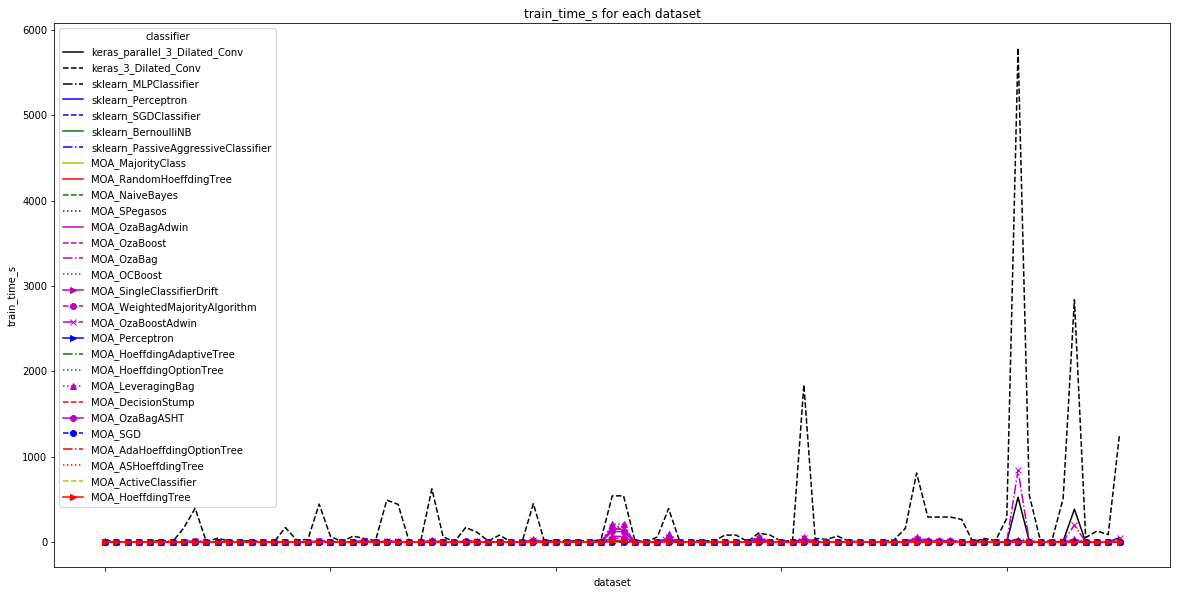

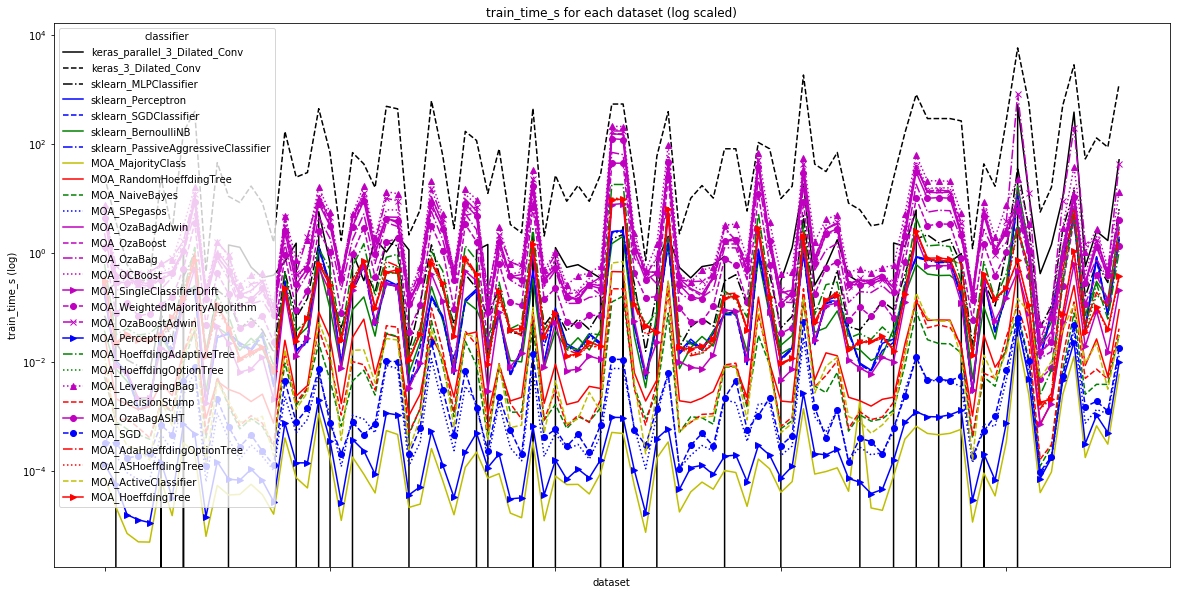

['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv', 'sklearn_MLPClassifier']


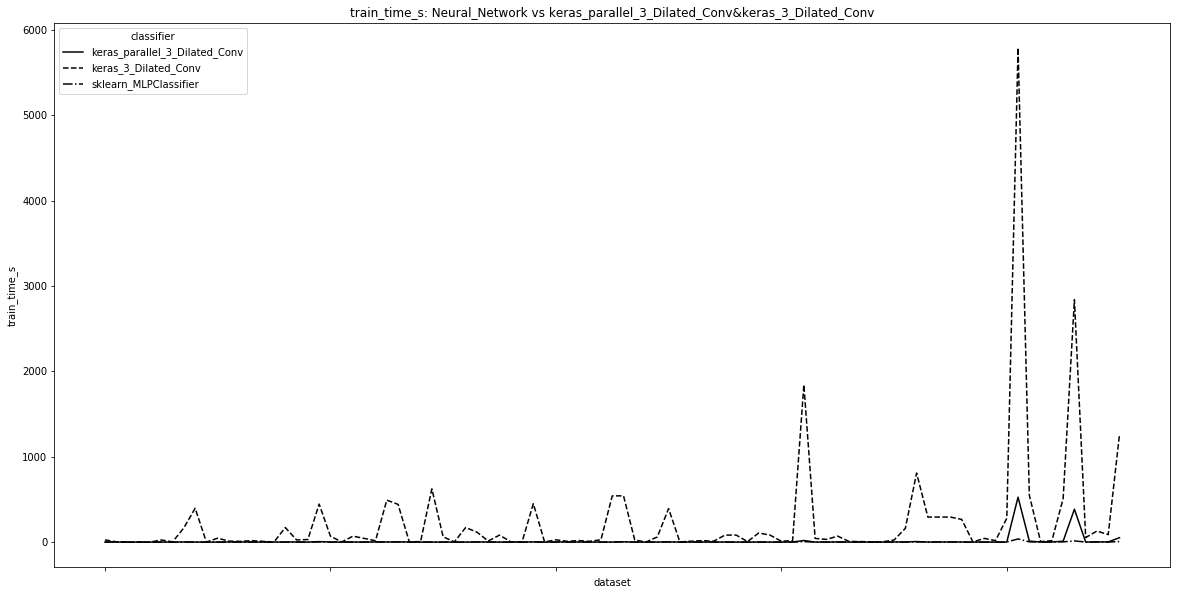

['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv', 'sklearn_Perceptron', 'sklearn_SGDClassifier', 'sklearn_PassiveAggressiveClassifier', 'MOA_SPegasos', 'MOA_Perceptron', 'MOA_SGD']


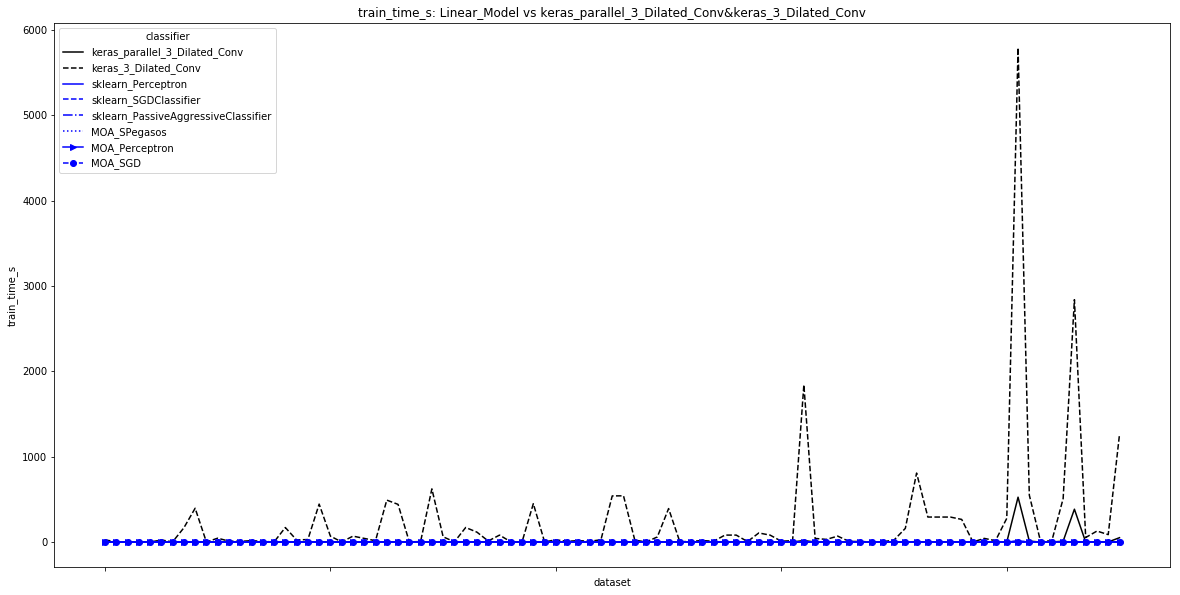

['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv', 'sklearn_BernoulliNB', 'MOA_NaiveBayes', 'MOA_HoeffdingAdaptiveTree', 'MOA_HoeffdingOptionTree']


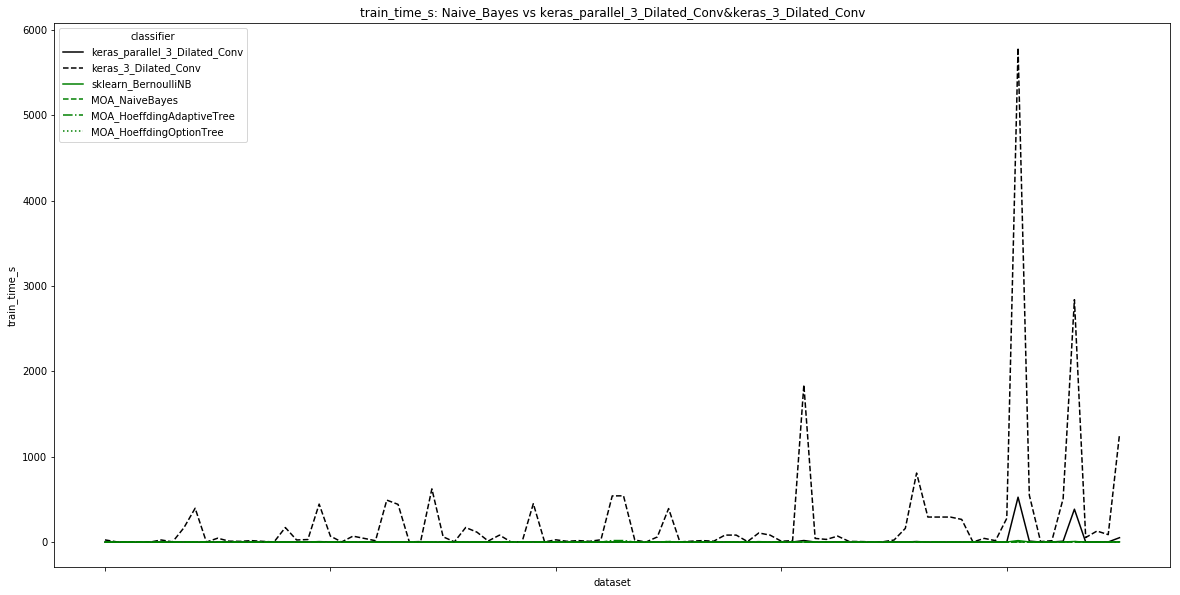

['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv', 'MOA_MajorityClass', 'MOA_ActiveClassifier']


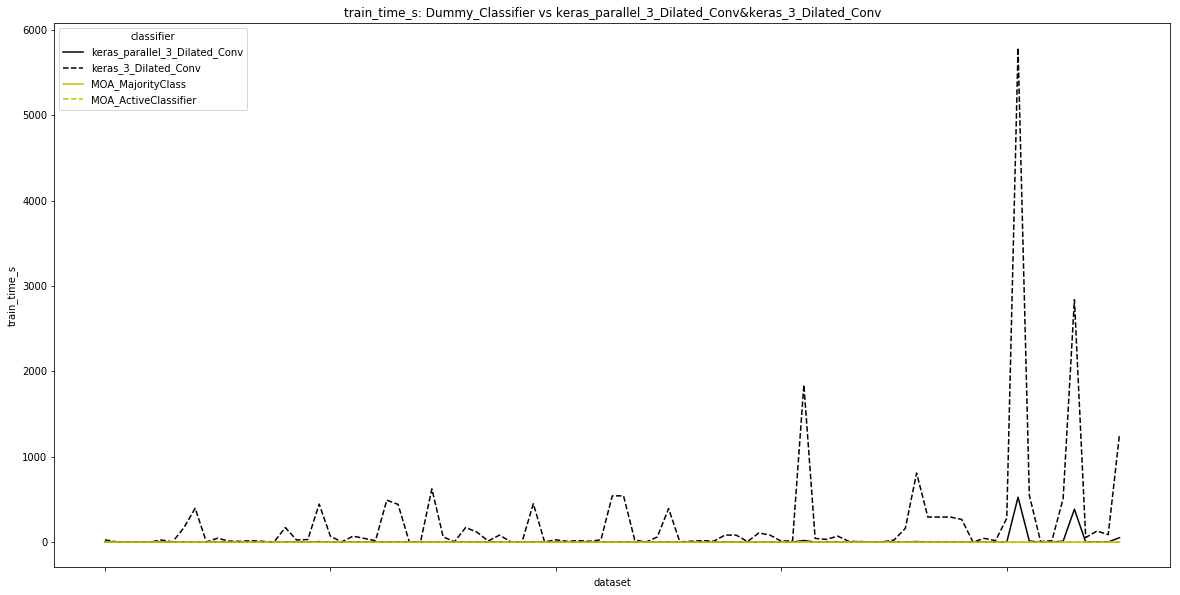

['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv', 'MOA_RandomHoeffdingTree', 'MOA_DecisionStump', 'MOA_AdaHoeffdingOptionTree', 'MOA_ASHoeffdingTree', 'MOA_HoeffdingTree']


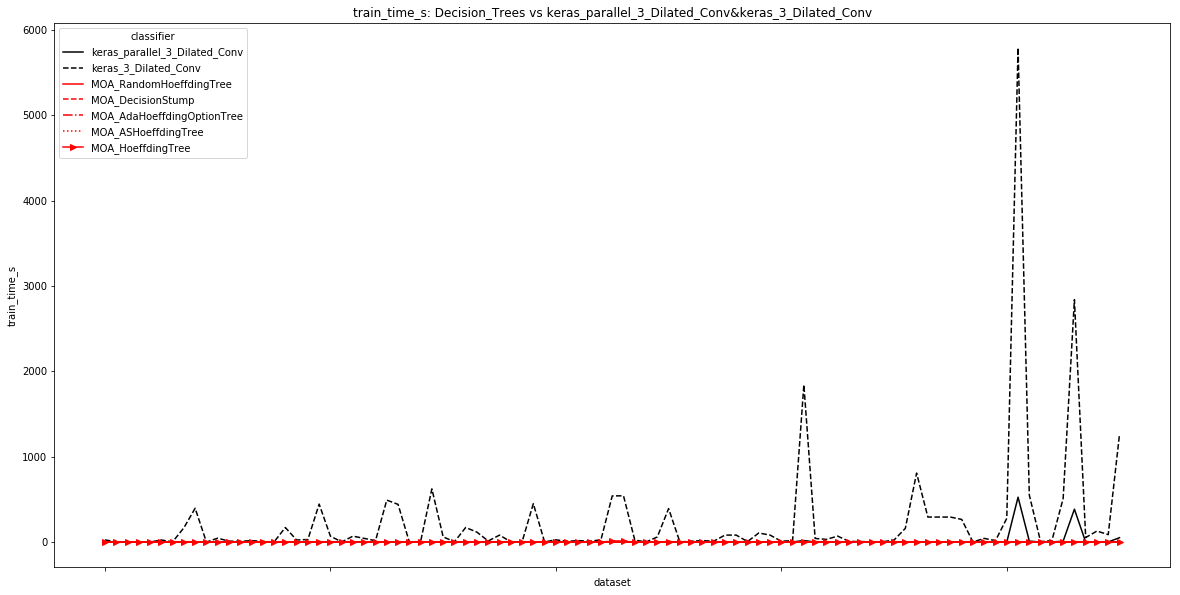

['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv', 'MOA_OzaBagAdwin', 'MOA_OzaBoost', 'MOA_OzaBag', 'MOA_OCBoost', 'MOA_SingleClassifierDrift', 'MOA_WeightedMajorityAlgorithm', 'MOA_OzaBoostAdwin', 'MOA_LeveragingBag', 'MOA_OzaBagASHT']


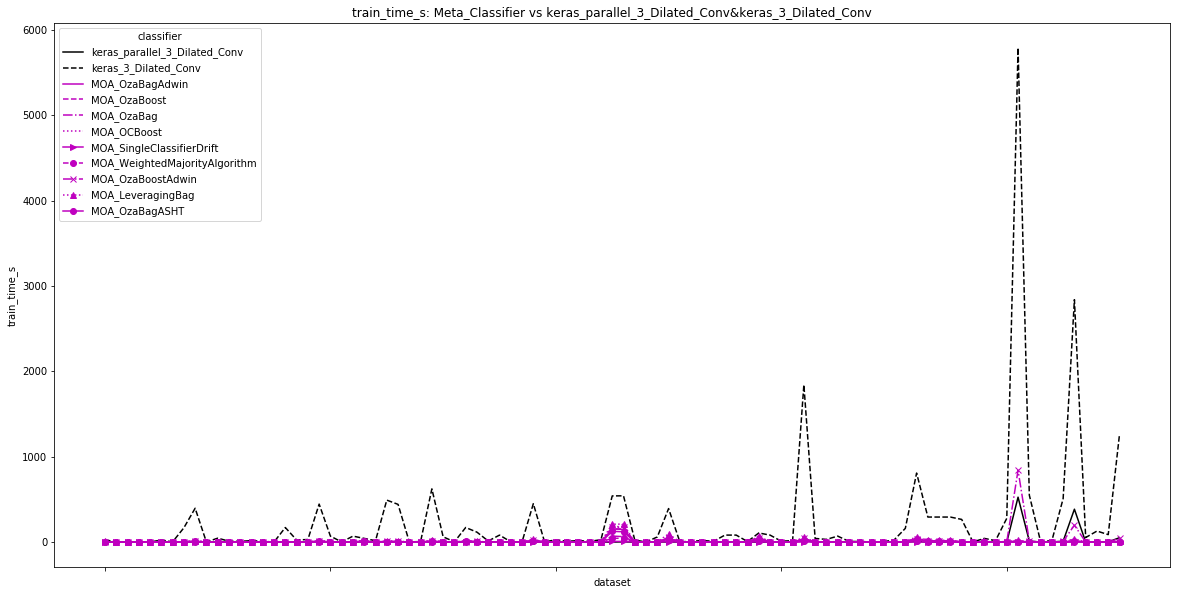

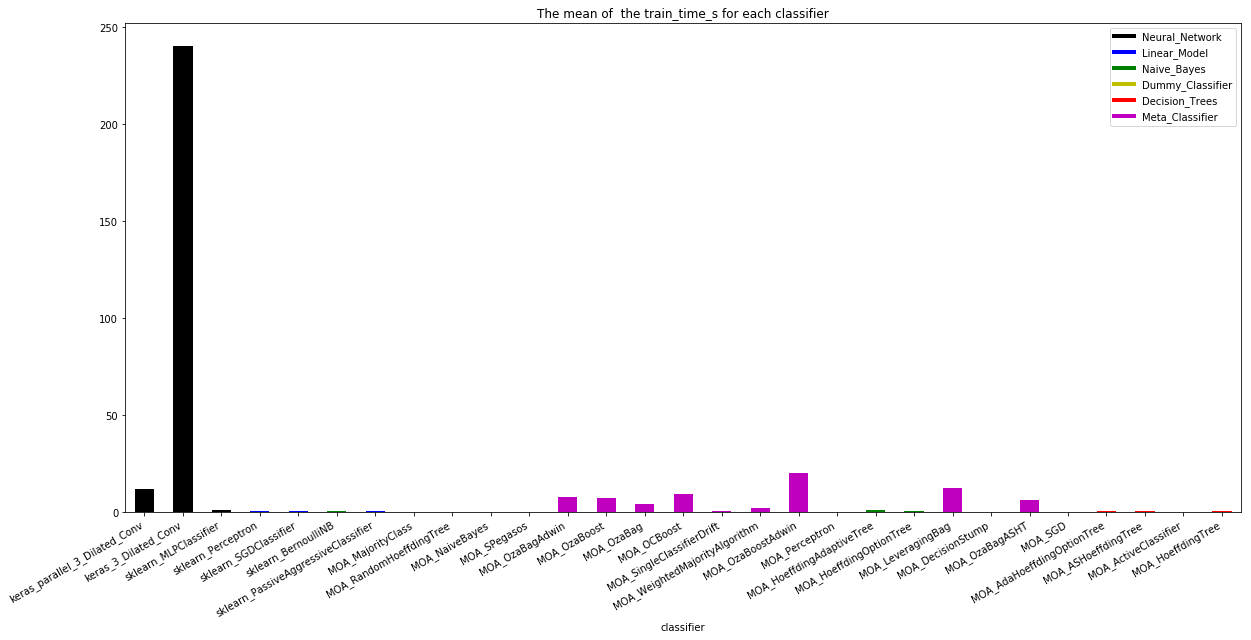

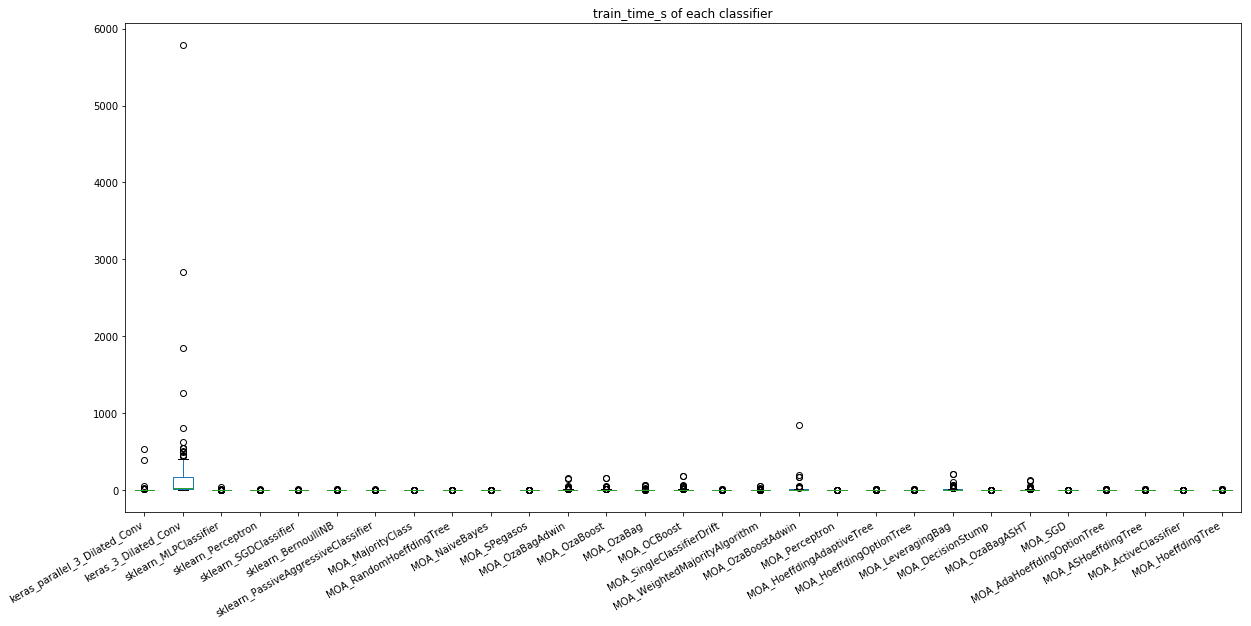

In [11]:
## Plot 
ax = metrics_table.plot(figsize=(20,10),   style=style, title= _METRIC+' for each dataset' )
ax.set_ylabel(_METRIC)
ax.get_figure().savefig(directory+'plot.png')
plt.show()

ax_log = metrics_table.plot(figsize=(20,10), logy=True,  style=style, title= _METRIC+' for each dataset (log scaled)' )
ax_log.set_ylabel(_METRIC+' (log)')
ax_log.get_figure().savefig(directory+'plot_log.png')
plt.show()

pdf_img_ls = [directory+'plot.png', directory+'plot_log.png' ]

for family in family_label.keys():
    classifiers_to_plot = [classifier for (classifier,f) in classifier_family.items() if f==family or classifier in classifier_to_compare]
    color_aux = [family_color[classifier_family[classifier]] for classifier in classifiers_to_plot]
    line_aux = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifiers_to_plot]
    style_aux = [c+s for c,s in list(zip(color_aux,line_aux))]
    metrics_table_aux = metrics_table[classifiers_to_plot]
    ax = metrics_table_aux.plot(figsize=(20,10), style=style_aux, title= _METRIC+': '+family_label[family]+' vs '+'&'.join(classifier_to_compare) )
    ax.set_ylabel(_METRIC)
    ax.get_figure().savefig(directory + 'plot_' + family +'.png')
    plt.show()
    pdf_img_ls.append(directory + 'plot_' + family +'.png')


## Bar plot (mean)
legend = [Line2D([0], [0], color=c, lw=4, label=family_label[f]) for f,c in family_color.items()]

ax = metrics_table.mean().plot.bar(figsize=(20,10), color=color, title= 'The mean of  the '+_METRIC+' for each classifier')
ax.legend(handles=legend)
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'mean.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'mean.png']
                           
#ax_log = metrics_table.mean().plot.bar(figsize=(20,10), color=color, logy=True, title= 'The mean of  the  '+_METRIC+' for each classifier (log scaled)')
#ax_log.legend(handles=legend)
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'mean_log.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'mean_log.png']

## Box Plot 
ax = metrics_table.plot.box(figsize=(20,10), title= _METRIC+' of each classifier')
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'box.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'box.png']
                           
#ax_log = metrics_table.plot.box(figsize=(20,10), logy=True, title= _METRIC+'  of each classifier (log scaled)')
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'box_log.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'box_log.png']

In [12]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls]
pdf_filename = directory+_METRIC+'.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []

### We divide the value for each minimum

In [13]:
metrics_table_min = metrics_table.min(axis=1)
metrics_table_proportionate = metrics_table.divide(metrics_table_min, axis=0)

# Add mean row and save to file
metrics_table_proportionate.loc['mean'] = metrics_table_proportionate.mean()
metrics_table_proportionate.to_csv(directory+'table_'+_METRIC+'_prop.csv')
metrics_table_proportionate = metrics_table_proportionate.drop(index='mean')

metrics_table_proportionate.head()

classifier,keras_parallel_3_Dilated_Conv,keras_3_Dilated_Conv,sklearn_MLPClassifier,sklearn_Perceptron,sklearn_SGDClassifier,sklearn_BernoulliNB,sklearn_PassiveAggressiveClassifier,MOA_MajorityClass,MOA_RandomHoeffdingTree,MOA_NaiveBayes,...,MOA_HoeffdingAdaptiveTree,MOA_HoeffdingOptionTree,MOA_LeveragingBag,MOA_DecisionStump,MOA_OzaBagASHT,MOA_SGD,MOA_AdaHoeffdingOptionTree,MOA_ASHoeffdingTree,MOA_ActiveClassifier,MOA_HoeffdingTree
dataset,,,,,,,,,,,,,,,,,,,,,
Adiac,2529.732688,3.326122e+05,933.282905,2520.357254,2436.365099,483.680039,2272.444723,1.000000,403.538898,71.191685,...,8261.768573,4587.841424,9.933747e+04,95.562341,5.869060e+04,4.285939,4991.330181,4224.583219,176.536217,4077.665058
ArrowHead,12454.511181,1.731009e+05,1030.319490,485.065087,432.816678,341.246424,412.470095,1.000000,95.548867,36.542759,...,1432.305154,1005.323524,1.744514e+04,38.053638,1.306787e+04,15.037721,972.058186,987.093945,34.460763,1023.981942
Beef,NaN,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
BeetleFly,NaN,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
BirdChicken,NaN,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


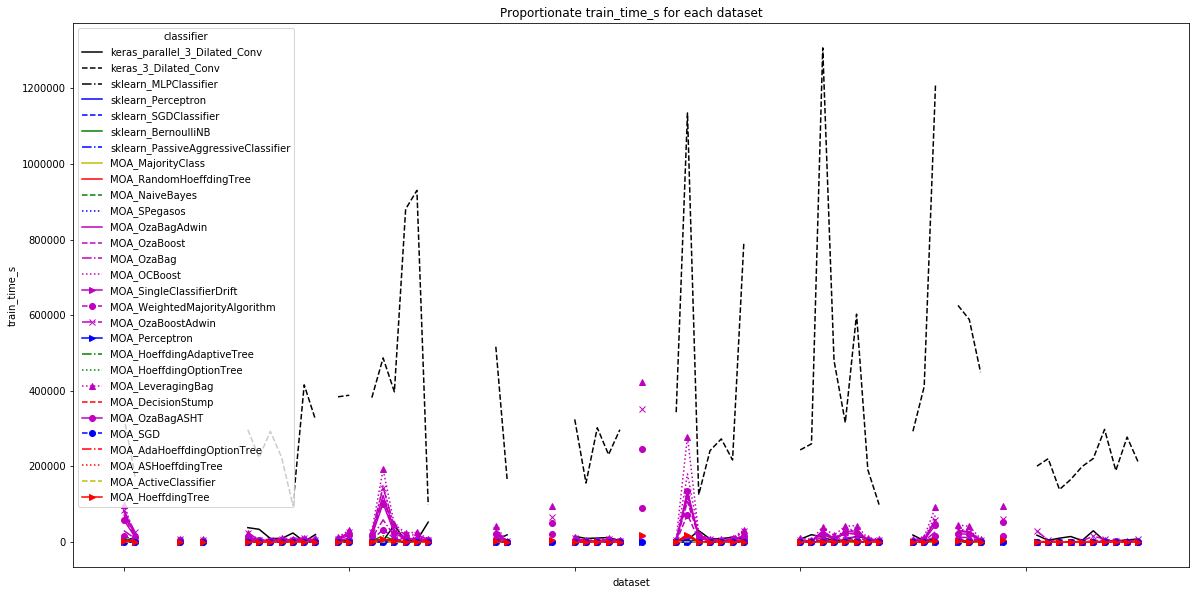

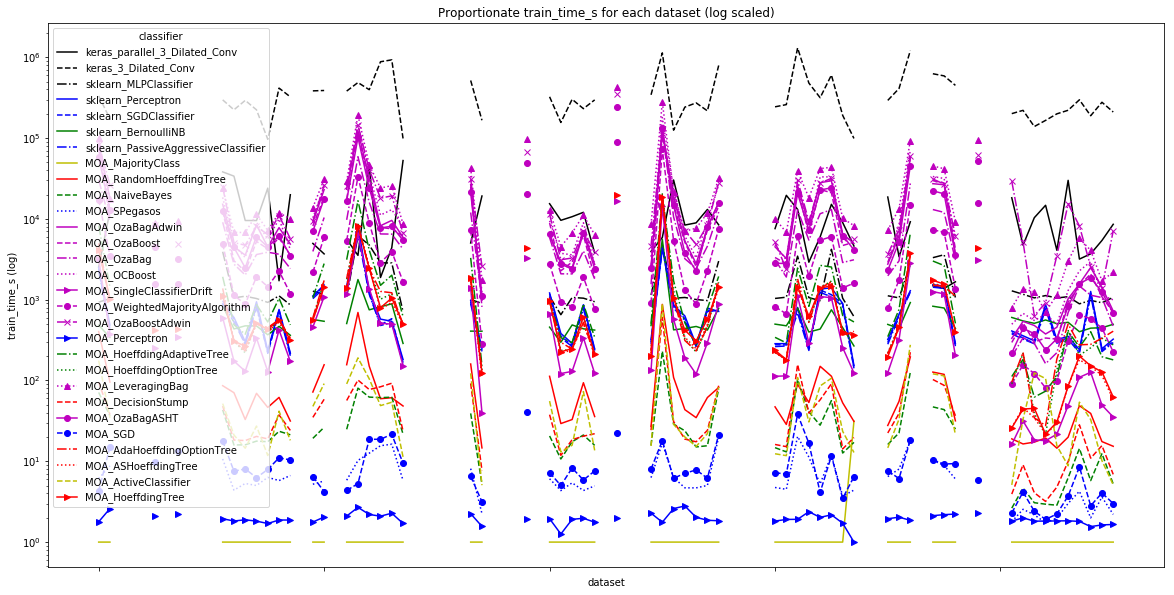

['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv', 'sklearn_MLPClassifier']


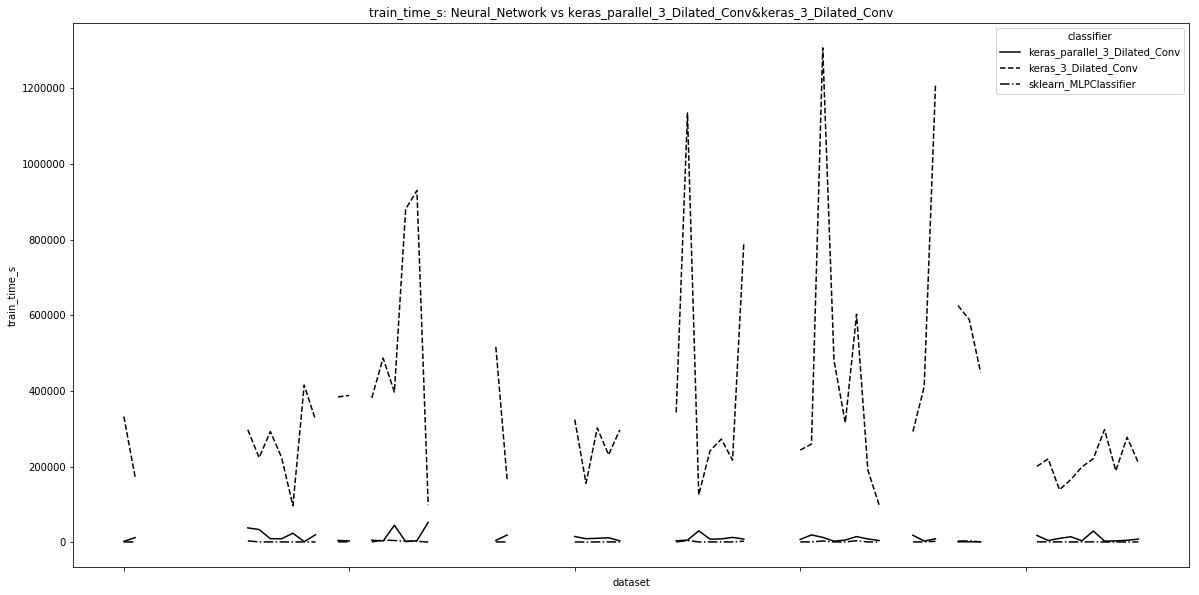

['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv', 'sklearn_Perceptron', 'sklearn_SGDClassifier', 'sklearn_PassiveAggressiveClassifier', 'MOA_SPegasos', 'MOA_Perceptron', 'MOA_SGD']


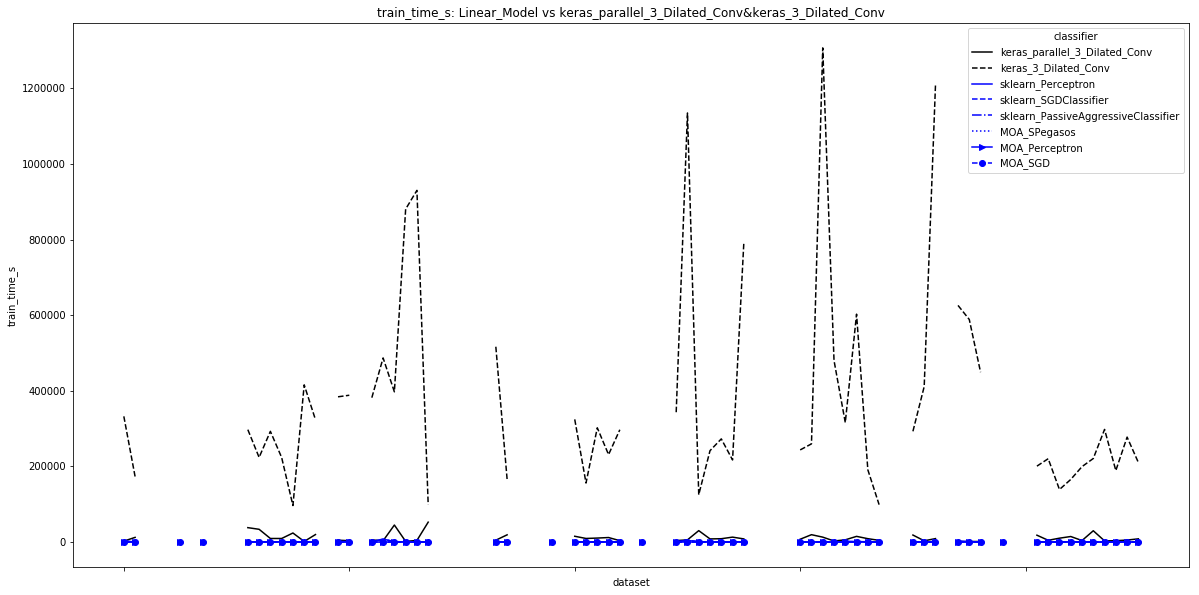

['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv', 'sklearn_BernoulliNB', 'MOA_NaiveBayes', 'MOA_HoeffdingAdaptiveTree', 'MOA_HoeffdingOptionTree']


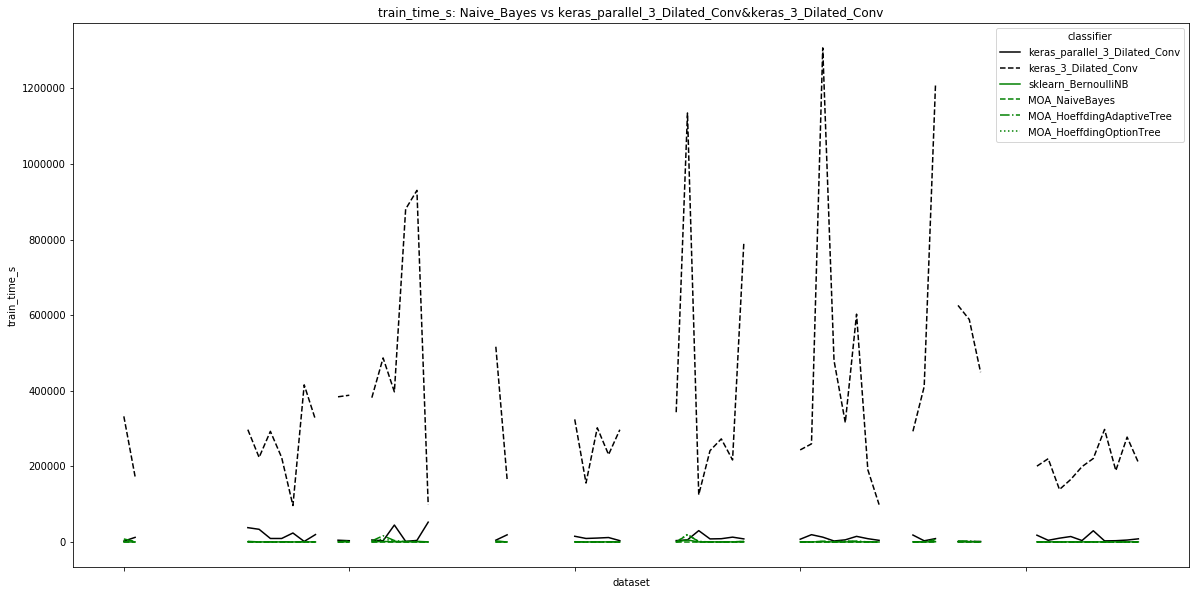

['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv', 'MOA_MajorityClass', 'MOA_ActiveClassifier']


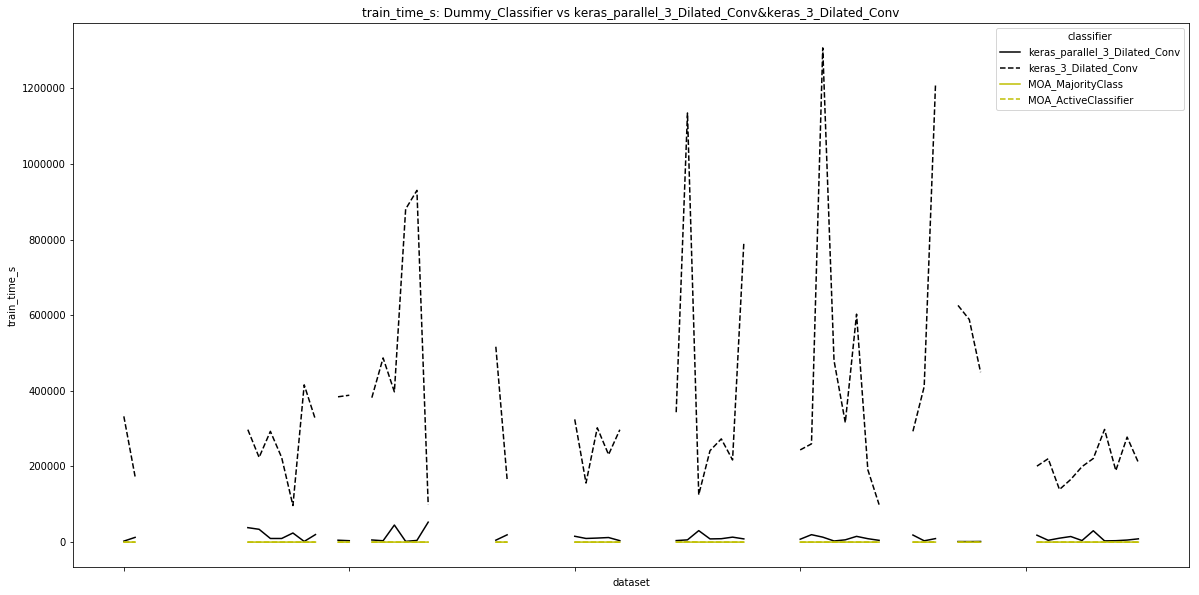

['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv', 'MOA_RandomHoeffdingTree', 'MOA_DecisionStump', 'MOA_AdaHoeffdingOptionTree', 'MOA_ASHoeffdingTree', 'MOA_HoeffdingTree']


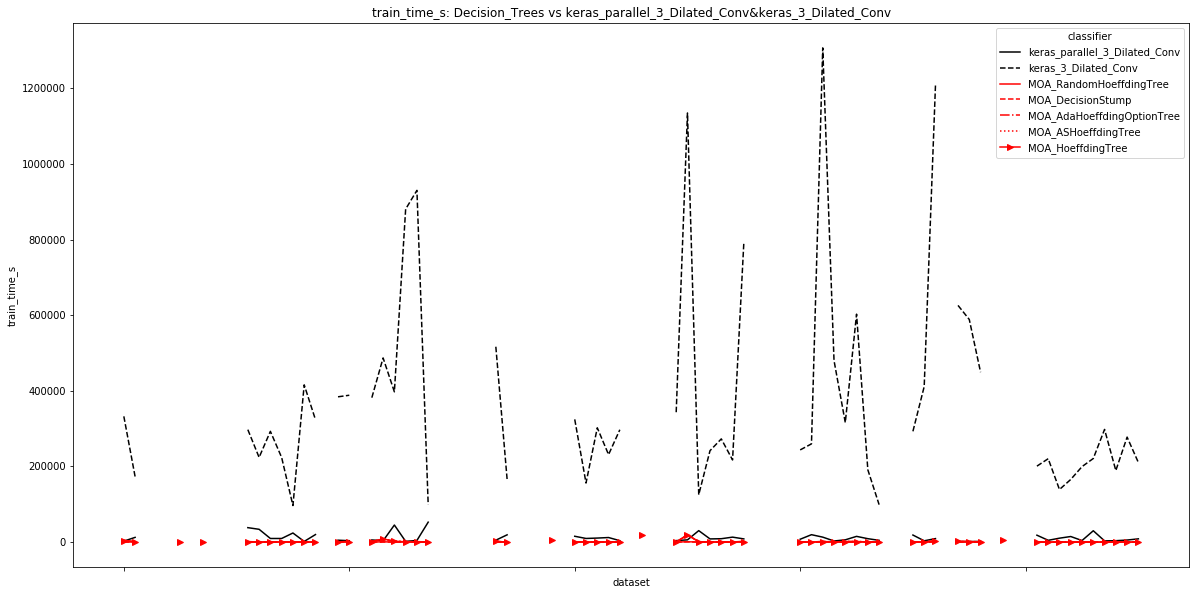

['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv', 'MOA_OzaBagAdwin', 'MOA_OzaBoost', 'MOA_OzaBag', 'MOA_OCBoost', 'MOA_SingleClassifierDrift', 'MOA_WeightedMajorityAlgorithm', 'MOA_OzaBoostAdwin', 'MOA_LeveragingBag', 'MOA_OzaBagASHT']


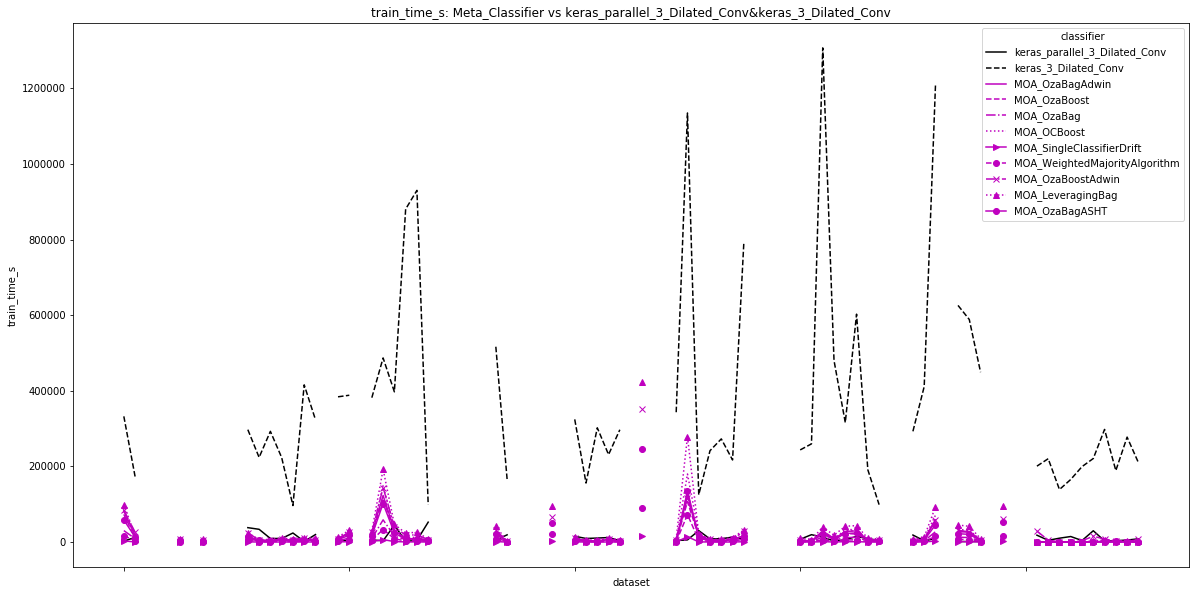

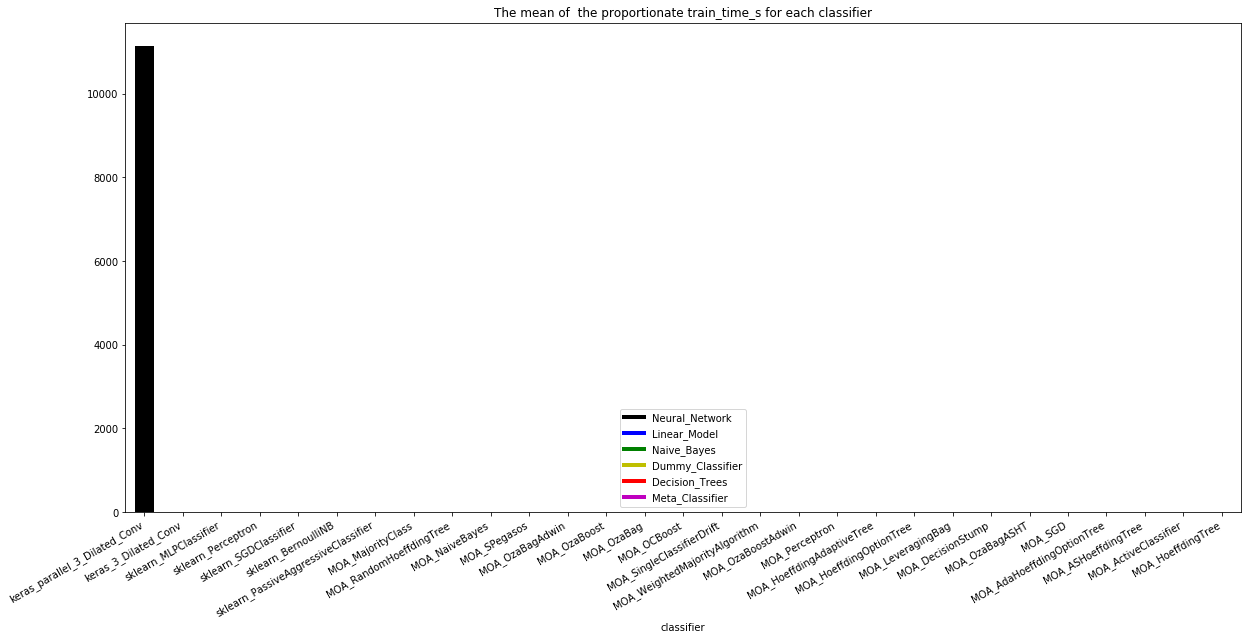

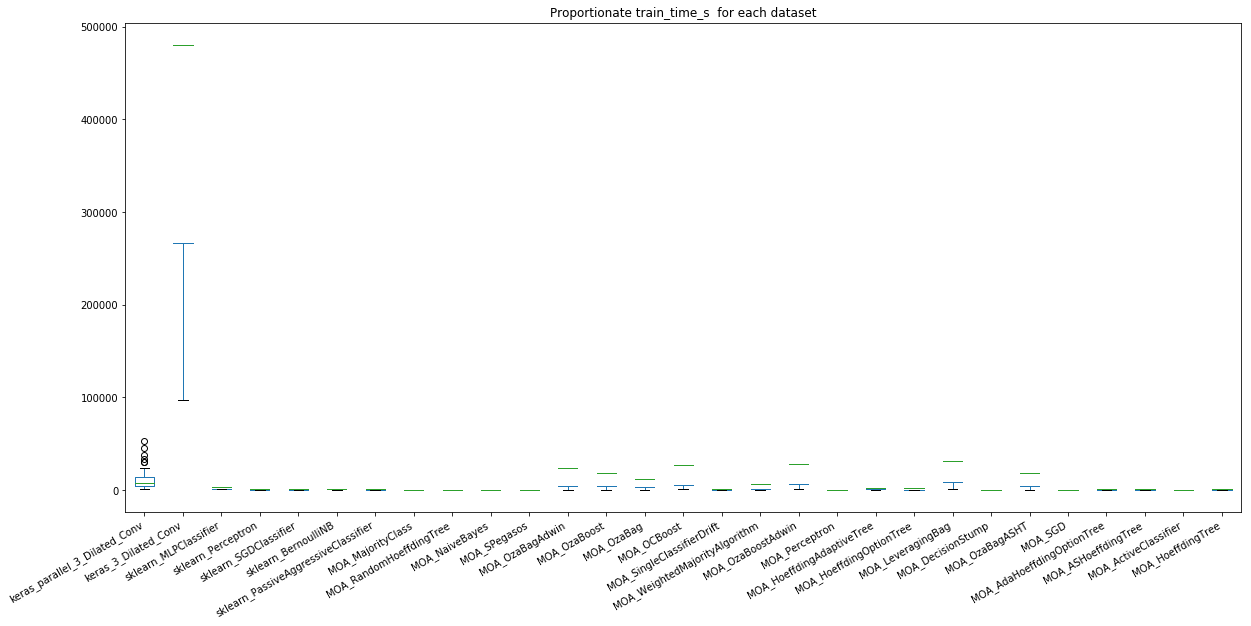

In [14]:
## Plot
ax = metrics_table_proportionate.plot(figsize=(20,10),   style=style, title= 'Proportionate '+_METRIC+' for each dataset' )
ax.set_ylabel(_METRIC)
ax.get_figure().savefig(directory+'plot_prop.png')
plt.show()

ax_log = metrics_table_proportionate.plot(figsize=(20,10),   style=style, title= 'Proportionate '+_METRIC+' for each dataset (log scaled)' , logy=True)
ax_log.set_ylabel(_METRIC+' (log)')
ax_log.get_figure().savefig(directory+'plot_log_prop.png')
plt.show()

pdf_img_ls = [directory+'plot_prop.png', directory+'plot_log_prop.png']

for family in family_label.keys():
    classifiers_to_plot = [classifier for (classifier,f) in classifier_family.items() if f==family or classifier in classifier_to_compare]
    color_aux = [family_color[classifier_family[classifier]] for classifier in classifiers_to_plot]
    line_aux = [line_style[family_classifier[classifier_family[classifier]].index(classifier)] for classifier in classifiers_to_plot]
    style_aux = [c+s for c,s in list(zip(color_aux,line_aux))]
    metrics_table_aux = metrics_table_proportionate[classifiers_to_plot]
    ax = metrics_table_aux.plot(figsize=(20,10), style=style_aux, title= _METRIC+': '+family_label[family]+' vs '+'&'.join(classifier_to_compare) )
    ax.set_ylabel(_METRIC)
    ax.get_figure().savefig(directory + 'plot_' + family +'_prop.png')
    plt.show()
    pdf_img_ls.append(directory + 'plot_' + family +'_prop.png')

## Bar plot (mean)
legend = [Line2D([0], [0], color=c, lw=4, label=family_label[f]) for f,c in family_color.items()]

ax = metrics_table_proportionate.mean().plot.bar(figsize=(20,10), color=color, title= 'The mean of  the proportionate '+_METRIC+' for each classifier')
ax.legend(handles=legend)
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'mean_prop.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'mean_prop.png']
                           
#ax_log = metrics_table_proportionate.mean().plot.bar(figsize=(20,10), color=color, logy=True, title= 'The mean of  the proportionate '+_METRIC+' for each classifier (log scaled)')
#ax_log.legend(handles=legend)
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'mean_log_prop.png')
#plt.show()
#pdf_img_ls = pdf_img_ls + [directory+'mean_log_prop.png']

## Box Plot 
ax = metrics_table_proportionate.plot.box(figsize=(20,10), title= 'Proportionate '+_METRIC+'  for each dataset')
ax.get_figure().autofmt_xdate()
ax.get_figure().savefig(directory+'box_prop.png')
plt.show()
pdf_img_ls = pdf_img_ls + [directory+'box_prop.png']
                           
#ax_log = metrics_table_proportionate.plot.box(figsize=(20,10), logy=True, title= 'Proportionate '+_METRIC+'  for each dataset (log scaled)')
#ax_log.get_figure().autofmt_xdate()
#ax_log.get_figure().savefig(directory+'box_log_prop.png')
#plt.show()
#pdf_img_ls = pdf_img_ls +  [directory+'box_log_prop.png']

## Save plots as pdf

In [15]:
pdf_img_ls = [Image.open(i).convert('RGB') for i in pdf_img_ls]
pdf_filename = directory+_METRIC+'_prop.pdf'
first = pdf_img_ls[0].copy()
first.save(pdf_filename,"PDF", resolution=100.0, save_all=True, append_images=pdf_img_ls[1:])
pdf_img_ls = []